In [12]:
# importing libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

flow_from_directory: This method is useful when the image are placed in there respective class/label folders. This methd will identify classes automatically from the folder name.

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/deep_learning_bootcamp/day9/train',
                                                 target_size=(64, 64),
                                                 batch_size=8,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/deep_learning_bootcamp/day9/test',
                                                 target_size=(64, 64),
                                                 batch_size=8,
                                                 class_mode='binary')

Found 238 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [19]:
# model development
model = Sequential()
conv1 = model.add(Conv2D(32,
                         (3,3),
                         input_shape=(64, 64, 3),
                         activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
conv2 = model.add(Conv2D(32,
                         (3,3),
                         input_shape=(64, 64, 3),
                         activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(units=1,
                activation='sigmoid'))

In [31]:
# compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
# training model
model.fit(training_set,
          steps_per_epoch=10,
          epochs=10,
          validation_data=test_set,
          validation_steps=5)

Epoch 1/10
10/10 [==============================] - 3s 268ms/step - loss: 0.0414 - accuracy: 0.9625 - val_loss: 2.2009 - val_accuracy: 0.2308
Epoch 2/10
10/10 [==============================] - 2s 213ms/step - loss: 0.0833 - accuracy: 0.9744 - val_loss: 2.0211 - val_accuracy: 0.2051
Epoch 3/10
10/10 [==============================] - 2s 212ms/step - loss: 0.0240 - accuracy: 0.9875 - val_loss: 2.4753 - val_accuracy: 0.1538
Epoch 4/10
10/10 [==============================] - 2s 206ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 3.4144 - val_accuracy: 0.2308
Epoch 5/10
10/10 [==============================] - 2s 212ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 4.0805 - val_accuracy: 0.2308
Epoch 6/10
10/10 [==============================] - 2s 209ms/step - loss: 0.2961 - accuracy: 0.9750 - val_loss: 4.5383 - val_accuracy: 0.2308
Epoch 7/10
10/10 [==============================] - 2s 209ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 2.5085 - val_accuracy: 0.0256
Epoch 

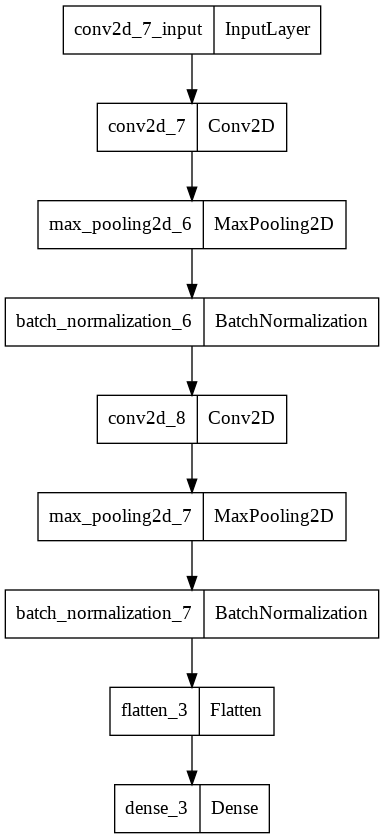

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [35]:
test_image = image.load_img('/content/drive/MyDrive/deep_learning_bootcamp/day9/test/Non Covid-20220427T083329Z-001.zip(test)/Non Covid/Non_Corona1_134.jpg',
                              target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,
                            axis=0)
result = model.predict(test_image)
print(result[0][0])

if result[0][0] == 0:
  print('Corona Positive')
else:
  print('Corona Negative')

0.0
Corona Positive
